In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1,as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X,y=mnist["data"],mnist["target"]
X.shape


(70000, 784)

In [3]:
y.shape

(70000,)

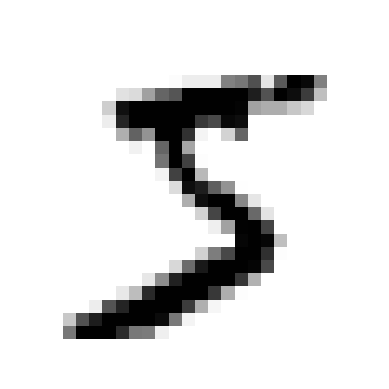

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit=X[0]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=mpl.cm.binary)
plt.axis('off')
plt.show()

In [5]:
y[0]

'5'

In [6]:
import numpy as np
y=y.astype(np.uint8)

In [7]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [8]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [9]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(max_iter=1000,tol=1e-3,random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [10]:
def plot_digit(data):
    image=data.reshape(28,28)
    plt.imshow(image,cmap=mpl.cm.binary,interpolation="nearest")
    plt.axis('off')

In [11]:
def plot_digits(instances,image_per_row=10,**options):
    size=28
    image_per_row=min(len(instances),image_per_row)
    n_rows=(len(instances)-1)//image_per_row+1
    n_empty=n_rows*image_per_row-len(instances)
    padded_instances=np.concatenate([instances,np.zeros((n_empty,size*size))],axis=0)
    image_grid=padded_instances.reshape((n_rows,image_per_row,size,size))
    big_image=image_grid.transpose(0,2,1,3).reshape(n_rows*size,image_per_row*size)
    plt.imshow(big_image,cmap=mpl.cm.binary,**options)
    plt.axis('off')

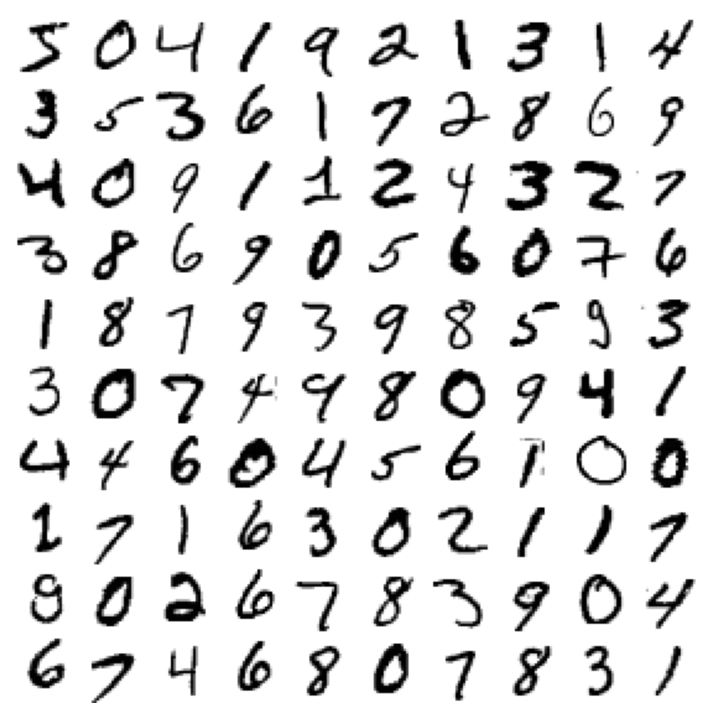

In [13]:
plt.figure(figsize=(9,9))
example_images=X[:100]
plot_digits(example_images,image_per_row=10)
plt.show()

In [14]:
sgd_clf.predict([some_digit])

array([ True])

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds=StratifiedKFold(n_splits=3,random_state=42,shuffle=True)
for train_index,test_index in skfolds.split(X_train,y_train_5):
    clone_clf=clone(sgd_clf)
    X_train_folds=X_train[train_index]
    y_train_folds=y_train_5[train_index]
    X_test_folds=X_train[test_index]
    y_test_fold=y_train_5[test_index]

    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_folds)
    n_correct=sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))


0.9669
0.91625
0.96785


In [16]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [18]:
from sklearn.model_selection import cross_val_score
never_5_clf=Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

**CONFUSION MATRIX**

In [20]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)


array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

*/PERFECT CLASSIFIER/*

In [22]:
y_train_perfect_predictions=y_train_5
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [23]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [24]:
cm=confusion_matrix(y_train_5,y_train_pred)
cm[1,1]/(cm[0,1]+cm[1,1])

0.8370879772350012

In [25]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [26]:
cm[1,1]/(cm[1,0]+cm[1,1])

0.6511713705958311

In [27]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343847

In [28]:
cm[1,1]/(cm[1,1]+(cm[1,0]+cm[0,1])/2)

0.7325171197343847

**PRECISION RECALL TRADEOFF**

In [29]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [30]:
threshold=0
y_some_digit_predict=(y_scores>threshold)
y_some_digit_predict

array([ True])

In [31]:
threshold=8000
y_some_digit_predict=(y_scores>threshold)
y_some_digit_predict

array([False])

In [32]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [33]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

In [38]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],'g-',label="Recall")
    plt.legend(loc="center right",fontsize=16)
    plt.xlabel("Threshold",fontsize=16)
    plt.grid(True)
    plt.axis([-50000,50000,0,1])
recall_90_precision=recalls[np.argmax(precisions>=0.90)]
threshold_90_precision=thresholds[np.argmax(precisions>=0.90)]


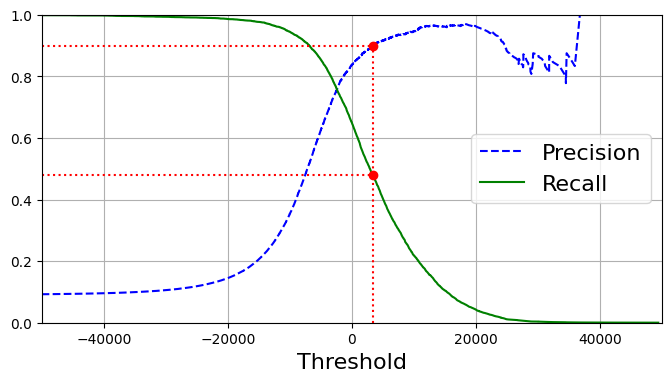

In [39]:
plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.plot([threshold_90_precision,threshold_90_precision],[0.,0.9],"r:")
plt.plot([-50000,threshold_90_precision],[0.9,0.9],"r:")
plt.plot([-50000,threshold_90_precision],[recall_90_precision,recall_90_precision],"r:")
plt.plot([threshold_90_precision],[0.9],"ro")
plt.plot([threshold_90_precision],[recall_90_precision],"ro")
plt.show()

In [40]:
(y_train_pred==(y_scores>0)).all()

True

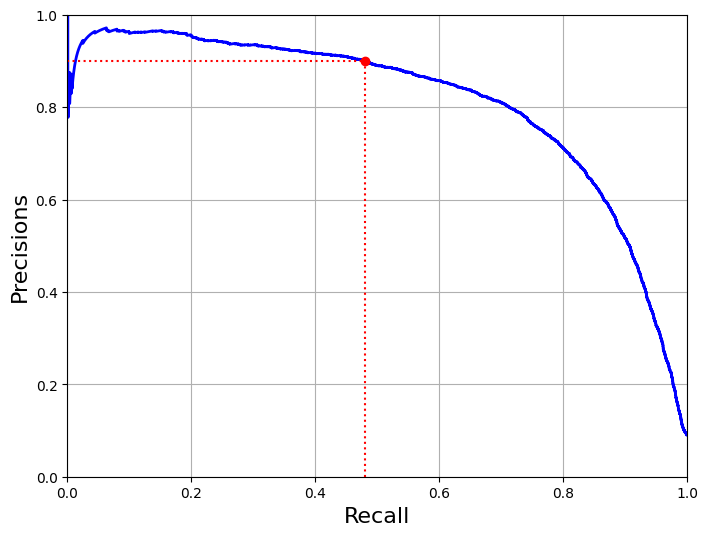

In [41]:
def plot_precision_vs_recall(precisions,recalls):
    plt.plot(recalls,precisions,"b-",linewidth=2)
    plt.xlabel("Recall",fontsize=16)
    plt.ylabel("Precisions",fontsize=16)
    plt.axis([0,1,0,1])
    plt.grid(True)
plt.figure(figsize=(8,6))
plot_precision_vs_recall(precisions,recalls)
plt.plot([recall_90_precision,recall_90_precision],[0.,0.9],'r:')
plt.plot([0.0,recall_90_precision],[0.9,0.9],'r:')
plt.plot([recall_90_precision],[0.9],"ro")
plt.show()

In [42]:
threshold_90_precision=thresholds[np.argmax(precisions>=0.90)]
threshold_90_precision

3370.0194991439557

In [43]:
y_train_pred_90=(y_scores>=threshold_90_precision)


In [44]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [45]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

**ROC CURVE**(receiver operating characteristic)

In [46]:
#plots TPR vs FPR(1-TNR(specificity))
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

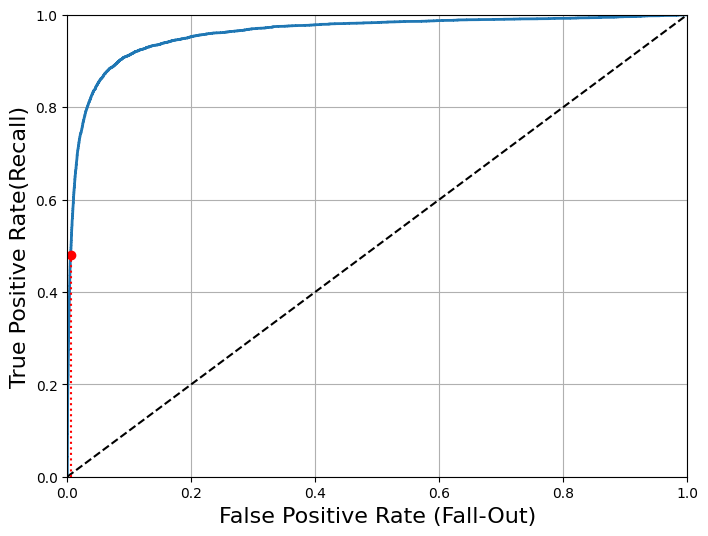

In [47]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate (Fall-Out)',fontsize=16)
    plt.ylabel('True Positive Rate(Recall)',fontsize=16)
    plt.grid(True)
plt.figure(figsize=(8,6))
plot_roc_curve(fpr,tpr)
fpr_90=fpr[np.argmax(tpr>=recall_90_precision)]
plt.plot([fpr_90,fpr_90],[0.,recall_90_precision],'r:')
plt.plot([0.0,fpr_90],[recall_90_precision,recall_90_precision],"r:")
plt.plot([fpr_90],[recall_90_precision],'ro')
plt.show()

In [48]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [49]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(n_estimators=100,random_state=42)
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

In [50]:
y_scores_forest=y_probas_forest[:,1]
fpr_forest,tpr_forest,threshold_forest=roc_curve(y_train_5,y_scores_forest)

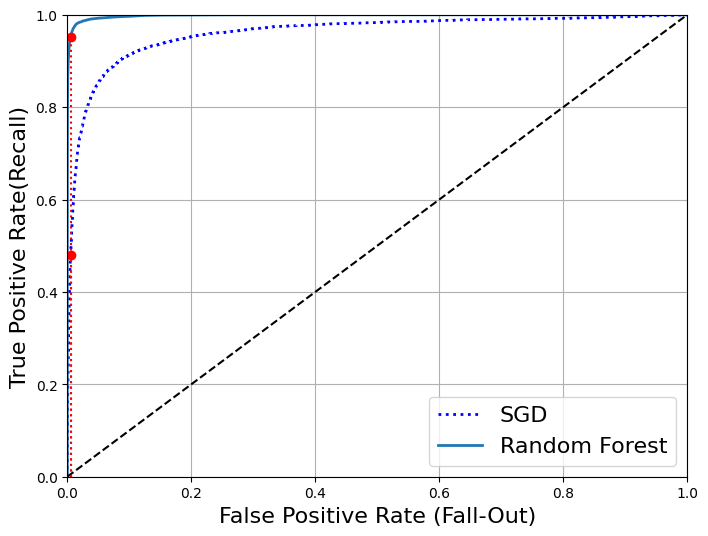

In [51]:
recall_forest=tpr_forest[np.argmax(fpr_forest>=fpr_90)]
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,"b:",linewidth=2,label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.plot([fpr_90,fpr_90],[0.,recall_90_precision],'r:')
plt.plot([0.0,fpr_90],[recall_90_precision,recall_90_precision],'r:')
plt.plot([fpr_90],[recall_90_precision],"ro")
plt.plot([fpr_90,fpr_90],[0.,recall_forest],'r:')
plt.plot([fpr_90],[recall_forest],'ro')
plt.grid(True)
plt.legend(loc='lower right',fontsize=16)
plt.show()

In [52]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

In [53]:
y_train_pred_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3)
precision_score(y_train_5,y_train_pred_forest)

0.9905083315756169

In [54]:
recall_score(y_train_5,y_train_pred_forest)

0.8662608374838591

**MULTICLASS CLASSIFICATION**

o OvR: one-versus-rest(gets decision score from each classifier for that image and we select the class with highest score)

o OvO: one-versus-one(for n classes, n*(n-1)/2 classifiers would be required)

In [57]:
from sklearn.svm import SVC
svm_clf=SVC(gamma='auto',random_state=42)
svm_clf.fit(X_train[:1000],y_train[:1000])
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [58]:
some_digit_scores=svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [59]:
np.argmax(some_digit_scores)

5

In [60]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [61]:
svm_clf.classes_[5]

5

In [62]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf=OneVsRestClassifier(SVC(gamma='auto',random_state=42))
ovr_clf.fit(X_train[:1000],y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [63]:
len(ovr_clf.estimators_)

10

In [64]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [65]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [66]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [67]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

**ERROR ANALYSIS**

In [68]:
y_train_pred=cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)